# 기본 세팅

In [1]:
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
plt.style.use('fivethirtyeight')
import warnings
warnings.filterwarnings('ignore')
%matplotlib inline

In [2]:
data = pd.read_csv('C:/Users/User/Documents/boot camp - study/github/hojeong-project/필사 스터디/titanic/train.csv')
df_test = pd.read_csv('C:/Users/User/Documents/boot camp - study/github/hojeong-project/필사 스터디/titanic/test.csv')

## 데이터 들여다보기

In [3]:
data.head(2)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C


In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [5]:
data.isnull().sum() # cabin , age , embarked 3변수 결측치가 있음 

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

# feature 분석

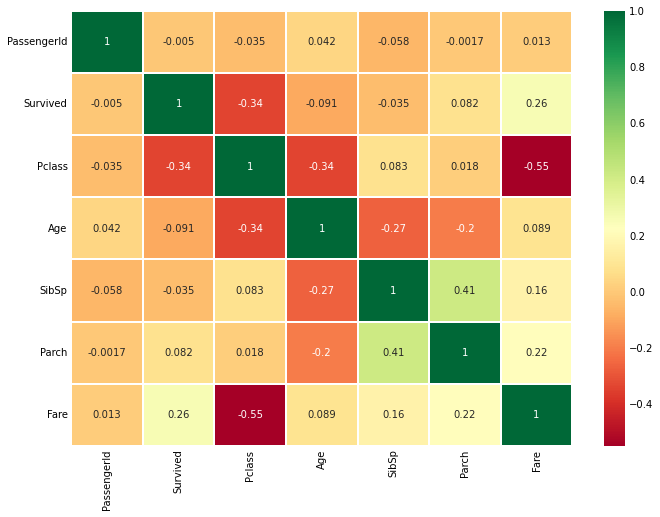

In [45]:
sns.heatmap(data.corr(),annot=True,cmap='RdYlGn',linewidths=0.2) #data.corr()-->correlation matrix
fig=plt.gcf()
fig.set_size_inches(10,8)
plt.show()

## target feature (survived)

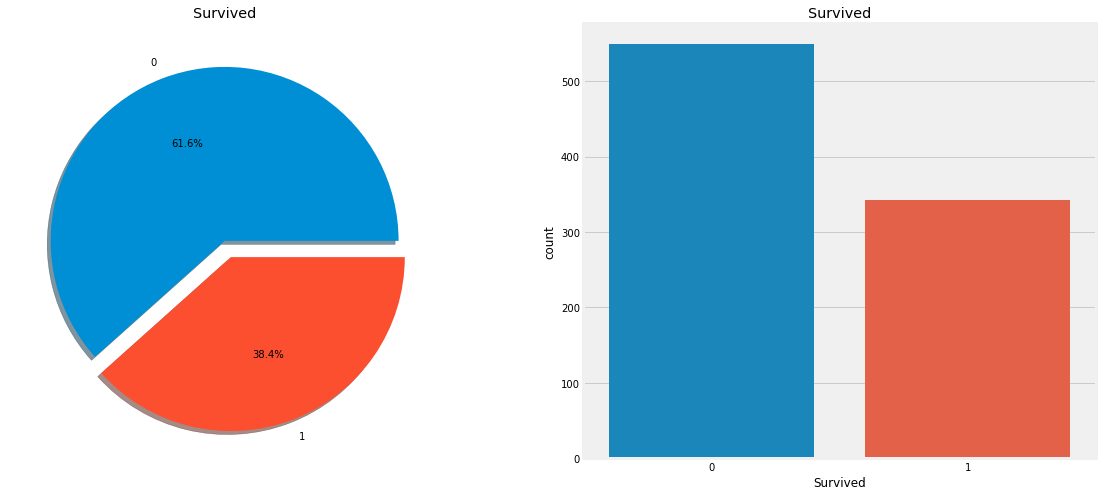

In [6]:
# survived 들여다보기 (파이차트,막대그래프(countplot))
f,ax=plt.subplots(1,2,figsize=(18,8))

data['Survived'].value_counts().plot.pie(explode=[0,0.1],autopct='%1.1f%%',ax=ax[0],shadow=True)
ax[0].set_title('Survived')
ax[0].set_ylabel('')

sns.countplot('Survived',data=data,ax=ax[1])
ax[1].set_title('Survived')
plt.show() 
# 생존이 350명으로 아주 적다 

## Categorical feature

### 1.Sex

In [7]:
data.groupby(['Sex','Survived'])['Survived'].count() 
# sex 에 따른 survived 본 결과 여자가 생존이 높음


Sex     Survived
female  0            81
        1           233
male    0           468
        1           109
Name: Survived, dtype: int64

In [8]:
pd.crosstab(data['Sex'],data['Survived'],margins=True).style.background_gradient(cmap='summer_r')
# sex 에 따른 survived 본 결과 여자가 생존이 높음

Survived,0,1,All
Sex,,,
female,81,233,314
male,468,109,577
All,549,342,891


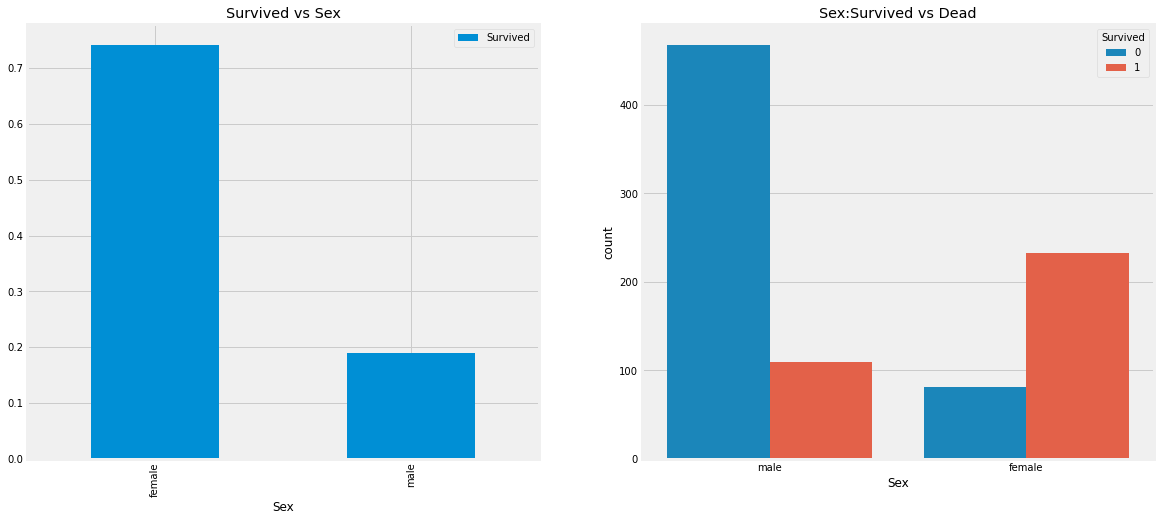

In [9]:
f,ax=plt.subplots(1,2,figsize=(18,8))

data[['Sex','Survived']].groupby(['Sex']).mean().plot.bar(ax=ax[0])
ax[0].set_title('Survived vs Sex') # 남,여 생존 평균 시각화

sns.countplot('Sex',hue='Survived',data=data,ax=ax[1])
ax[1].set_title('Sex:Survived vs Dead') # 남,여 생존 수 시각화 
plt.show() # 여자일때 생존이 높다는거 증명 

### 2.embakred

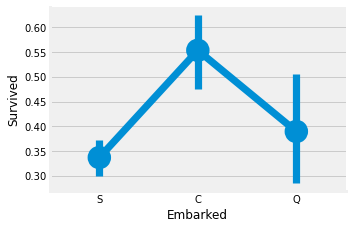

In [ ]:
sns.factorplot('Embarked','Survived',data=data)
fig=plt.gcf()
fig.set_size_inches(5,3)
plt.show()

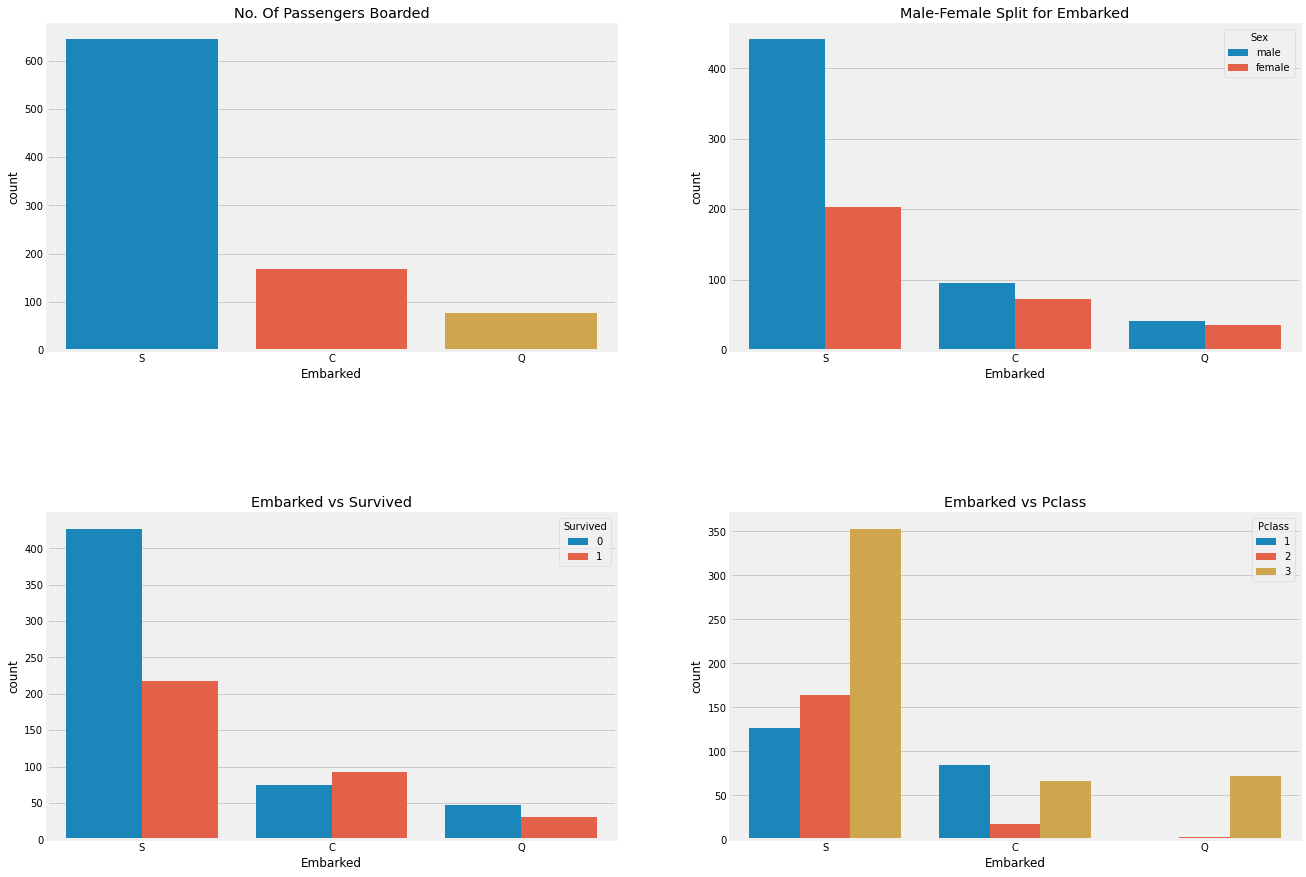

In [ ]:
f,ax=plt.subplots(2,2,figsize=(20,15))
sns.countplot('Embarked',data=data,ax=ax[0,0])
ax[0,0].set_title('No. Of Passengers Boarded') 
sns.countplot('Embarked',hue='Sex',data=data,ax=ax[0,1])
ax[0,1].set_title('Male-Female Split for Embarked') # 
sns.countplot('Embarked',hue='Survived',data=data,ax=ax[1,0])
ax[1,0].set_title('Embarked vs Survived')
sns.countplot('Embarked',hue='Pclass',data=data,ax=ax[1,1])
ax[1,1].set_title('Embarked vs Pclass')
plt.subplots_adjust(wspace=0.2,hspace=0.5)
plt.show()
# s등급이 가장 많은데 그들은 거의 pclass3등급 출신들
# c등급 있는 사람들이 거의 살았음
# q는 거의 95%가 pclass3출신

In [ ]:
pd.crosstab([data['Embarked'],data['Pclass'],data['Sex']],[data['Survived']],margins=True).style.background_gradient(cmap='summer_r')
# Embarked pclass ,sex 에 따른 survived
# C,Q등급 2pclass 여자는 한명도 안죽음

In [32]:
data['Embarked'].fillna('S',inplace=True) # 최빈값으로 채움

## oridinal feature(순서형 범주 변수)

### 1.pclass

In [10]:
pd.crosstab(data['Pclass'],data['Survived'],margins=True).style.background_gradient(cmap='summer_r')
# pclass가 1일때 생존이 많고 , pclass가 3일때 많이죽음

Survived,0,1,All
Pclass,,,
1,80,136,216
2,97,87,184
3,372,119,491
All,549,342,891


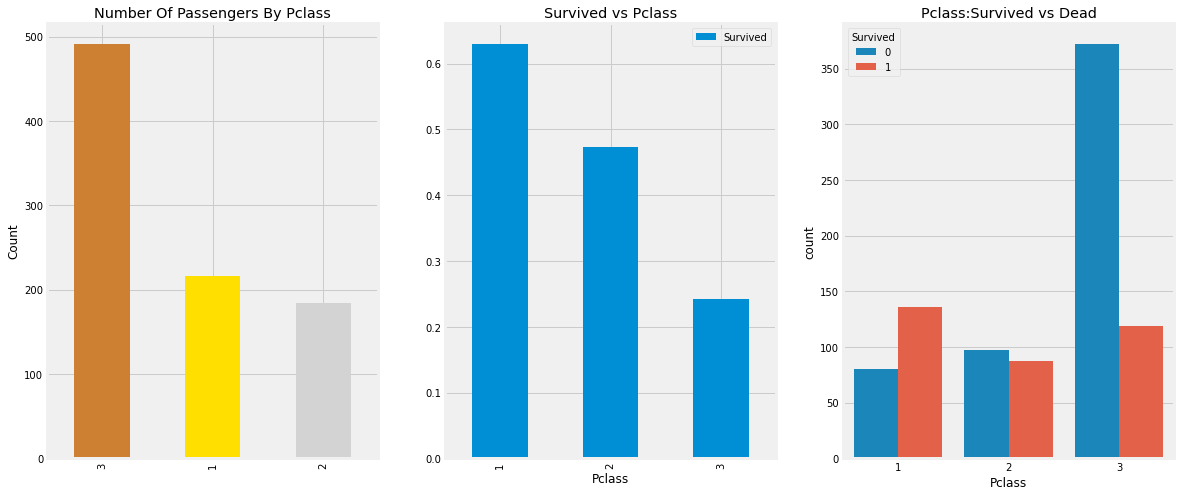

In [11]:
f,ax=plt.subplots(1,3,figsize=(18,8))

# 추가한 부분 
data['Pclass'].value_counts().plot.bar(color=['#CD7F32','#FFDF00','#D3D3D3'],ax=ax[0])
ax[0].set_title('Number Of Passengers By Pclass')
ax[0].set_ylabel('Count')

data[['Pclass','Survived']].groupby(['Pclass']).mean().plot.bar(ax=ax[1])
ax[1].set_title('Survived vs Pclass')  

sns.countplot('Pclass',hue='Survived',data=data,ax=ax[2])
ax[2].set_title('Pclass:Survived vs Dead')
plt.show() # pclass 카운트  , 생존평균 , 생존비율
# 3일때가 압도적으로 많이 죽고 , 1일떄는 산사람이 더 많다

#### 1.1 sex,pclass

In [12]:
pd.crosstab([data['Sex'],data['Survived']],data['Pclass'],margins=True).style.background_gradient(cmap='summer_r')
# sex , pclass 에 따른 생존 -> 여자 1,2등급은 합쳐서 9명죽음 

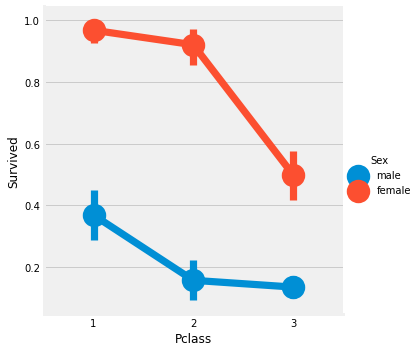

In [13]:
sns.factorplot('Pclass','Survived',hue='Sex',data=data)
plt.show() # hue는 몇개로 나타낼지 , survived 는 y축-> 2등급에서 격차가 벌어진다

## continuous feature

### age

In [14]:
print('Oldest Passenger was of:',data['Age'].max(),'Years')
print('Youngest Passenger was of:',data['Age'].min(),'Years')
print('Average Age on the ship:',data['Age'].mean(),'Years')

Oldest Passenger was of: 80.0 Years
Youngest Passenger was of: 0.42 Years
Average Age on the ship: 29.69911764705882 Years


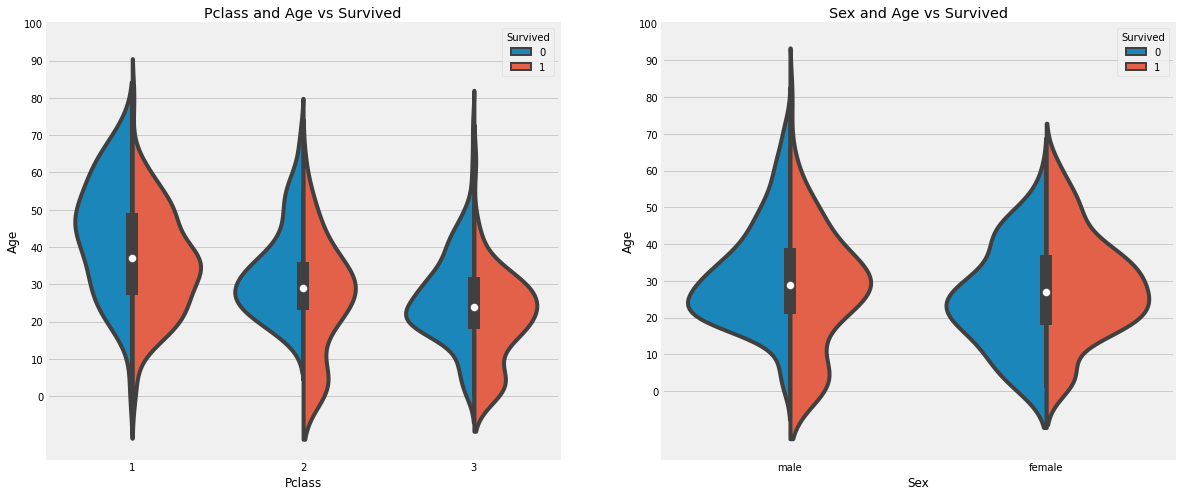

In [15]:
f,ax=plt.subplots(1,2,figsize=(18,8))

sns.violinplot("Pclass","Age", hue="Survived", data=data,split=True,ax=ax[0])
ax[0].set_title('Pclass and Age vs Survived')
ax[0].set_yticks(range(0,110,10))

sns.violinplot("Sex","Age", hue="Survived", data=data,split=True,ax=ax[1])
ax[1].set_title('Sex and Age vs Survived')
ax[1].set_yticks(range(0,110,10))
plt.show() # 순서형 , 연속형 을 target 범주별로 violinplot으로 나타냄

# pclass1에서 20~50세 사이에 사람이 많이 살고 여성이면 좋다 
# 남자는 나이가 많을수록 사망이 높아짐 

#### Initial 변수 생성(결측값 대치 용도)

In [16]:
data['Initial']=0
for i in data:
    data['Initial']=data.Name.str.extract('([A-Za-z]+)\.')
# Mr , Miss 등 이름만 추출 시킨 initial 컬럼 만듬 

In [17]:
pd.crosstab(data.Initial,data.Sex).T.style.background_gradient(cmap='summer_r')

Initial,Capt,Col,Countess,Don,Dr,Jonkheer,Lady,Major,Master,Miss,Mlle,Mme,Mr,Mrs,Ms,Rev,Sir
Sex,,,,,,,,,,,,,,,,,
female,0,0,1,0,1,0,1,0,0,182,2,1,0,125,1,0,0
male,1,2,0,1,6,1,0,2,40,0,0,0,517,0,0,6,1


In [18]:
data['Initial'].replace(['Mlle','Mme','Ms','Dr','Major','Lady','Countess','Jonkheer','Col','Rev','Capt','Sir','Don'],
                        ['Miss','Miss','Miss','Mr','Mr','Mrs','Mrs','Other','Other','Other','Mr','Mr','Mr'],inplace=True)



In [ ]:
data.groupby('Initial')['Age'].mean()

Initial
Master     4.574167
Miss      21.860000
Mr        32.739609
Mrs       35.981818
Other     45.888889
Name: Age, dtype: float64

In [21]:
# 평균에 맞는 결측값을 대치를 함 
data.loc[(data['Age'].isnull())&(data['Initial']=='Mr'),'Age']=33
data.loc[(data.Age.isnull())&(data.Initial=='Mrs'),'Age']=36
data.loc[(data.Age.isnull())&(data.Initial=='Master'),'Age']=5
data.loc[(data.Age.isnull())&(data.Initial=='Miss'),'Age']=22
data.loc[(data.Age.isnull())&(data.Initial=='Other'),'Age']=46


In [22]:
data['Age'].isnull().any() # 결측값 제거 잘 되었는지 확인

False

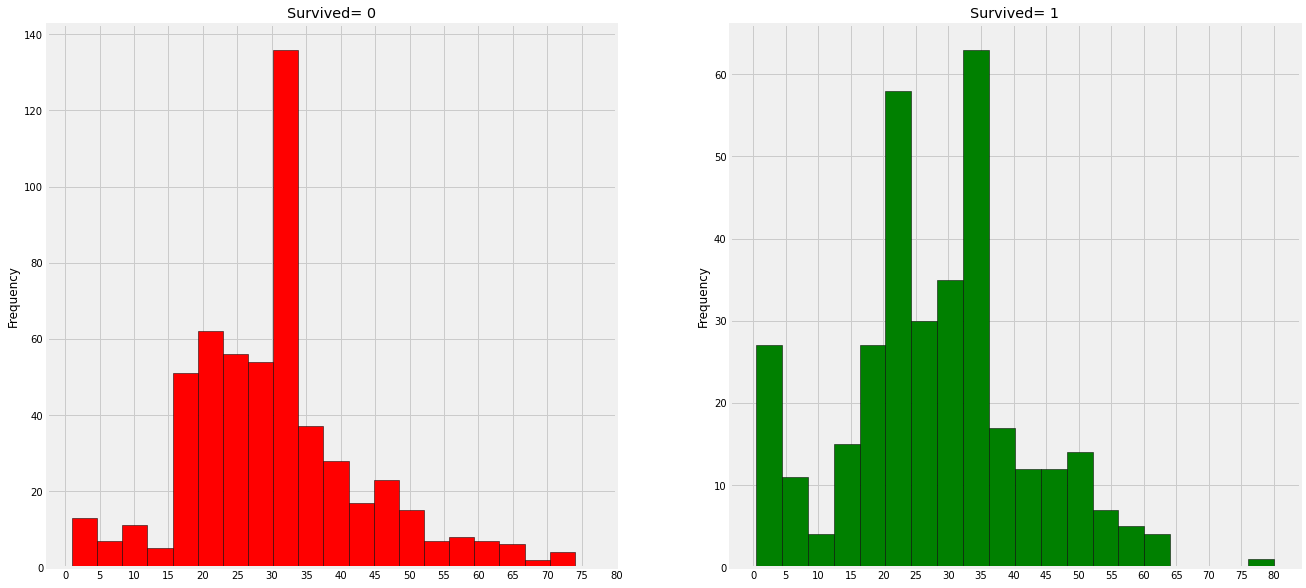

In [23]:
f,ax=plt.subplots(1,2,figsize=(20,10))

# survived에 따른 age를 히스토그램으로 그림 
data[data['Survived']==0].Age.plot.hist(ax=ax[0],bins=20,edgecolor='black',color='red')
ax[0].set_title('Survived= 0')
x1=list(range(0,85,5))
ax[0].set_xticks(x1)


data[data['Survived']==1].Age.plot.hist(ax=ax[1],color='green',bins=20,edgecolor='black')
ax[1].set_title('Survived= 1')
x2=list(range(0,85,5))
ax[1].set_xticks(x2)
plt.show()
# 5살 아래의 아이들이 죽은것보다 생존의 비율이 높음 
# 30~40대에  많이 죽음 

## fare

In [42]:
print('Highest Fare was:',data['Fare'].max())
print('Lowest Fare was:',data['Fare'].min())
print('Average Fare was:',data['Fare'].mean())

Highest Fare was: 512.3292
Lowest Fare was: 0.0
Average Fare was: 32.2042079685746


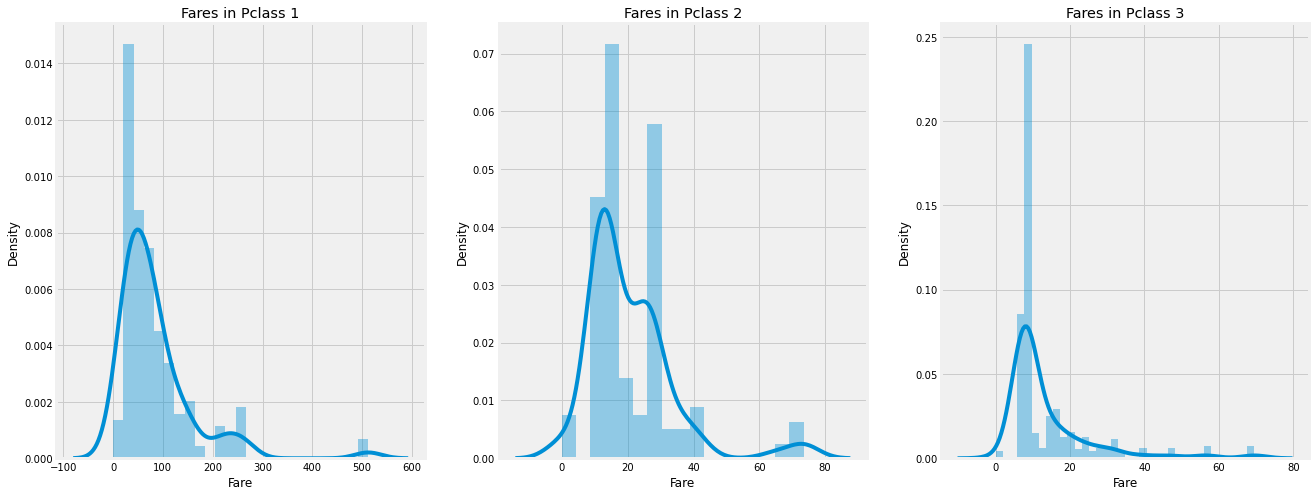

In [44]:
f,ax=plt.subplots(1,3,figsize=(20,8))

sns.distplot(data[data['Pclass']==1].Fare,ax=ax[0])
ax[0].set_title('Fares in Pclass 1')
sns.distplot(data[data['Pclass']==2].Fare,ax=ax[1])
ax[1].set_title('Fares in Pclass 2')
sns.distplot(data[data['Pclass']==3].Fare,ax=ax[2])
ax[2].set_title('Fares in Pclass 3')
plt.show() # pclass 따른 요금 (pclass1이 가장 비싸다 )

## 수치형 변수

### sibsp

In [33]:
pd.crosstab([data.SibSp],data.Survived).style.background_gradient(cmap='summer_r')

Survived,0,1
SibSp,,
0,398,210
1,97,112
2,15,13
3,12,4
4,15,3
5,5,0
8,7,0


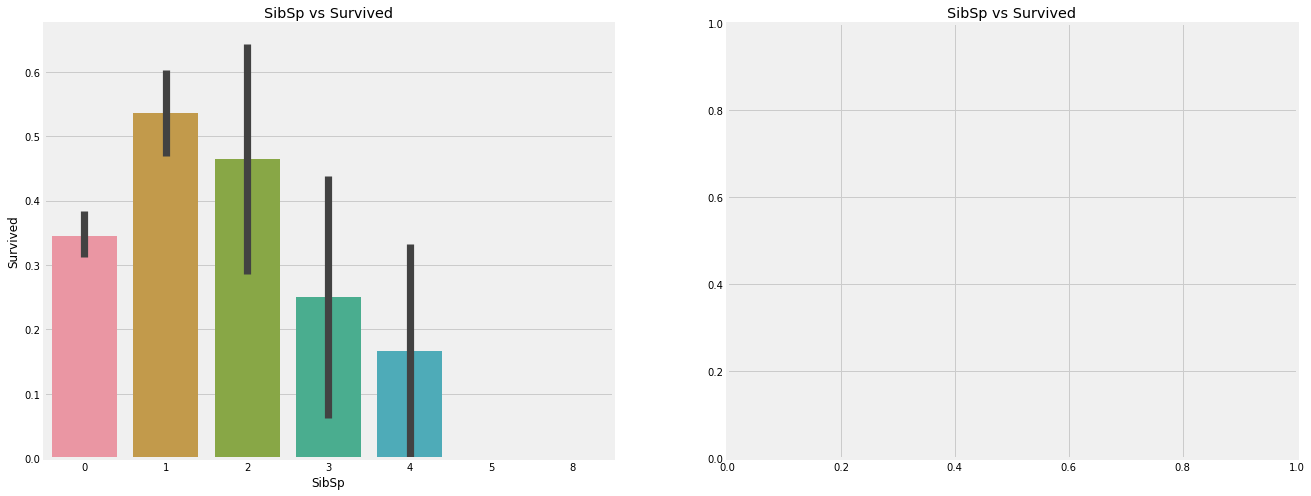

In [36]:
f,ax=plt.subplots(1,2,figsize=(20,8))

sns.barplot('SibSp','Survived',data=data,ax=ax[0]) # 바 그래프 
ax[0].set_title('SibSp vs Survived')

sns.factorplot('SibSp','Survived',data=data,ax=ax[1]) # 선그래프
ax[1].set_title('SibSp vs Survived')
plt.close(2)
plt.show() # 왜 안그려지지 ?

# 혼자 탑승 ,3,4일떄 생존률 낮음 / 5~8은 아예 0


In [38]:
pd.crosstab(data.SibSp,data.Pclass).style.background_gradient(cmap='summer_r')
# sibsp 3 이상 가진 사람들은 다 pclass 3 

Pclass,1,2,3
SibSp,,,
0,137,120,351
1,71,55,83
2,5,8,15
3,3,1,12
4,0,0,18
5,0,0,5
8,0,0,7


### parch

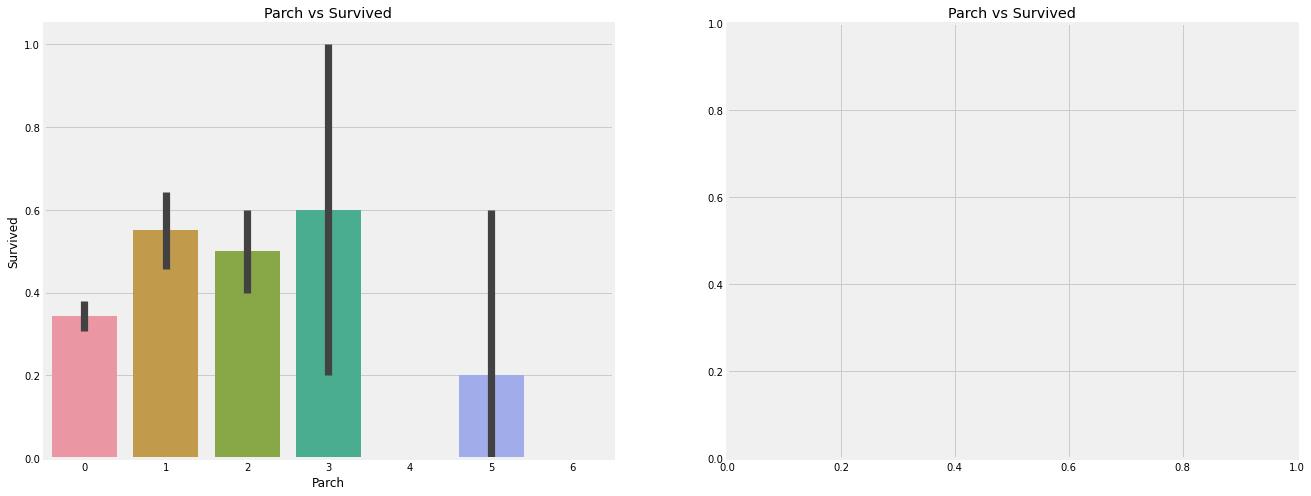

In [40]:
f,ax=plt.subplots(1,2,figsize=(20,8))
sns.barplot('Parch','Survived',data=data,ax=ax[0])
ax[0].set_title('Parch vs Survived')
sns.factorplot('Parch','Survived',data=data,ax=ax[1])
ax[1].set_title('Parch vs Survived')
plt.close(2)
# 생존이 1~3있느사람이 가장 높음 

In [41]:
pd.crosstab(data.Parch,data.Pclass).style.background_gradient(cmap='summer_r')

Pclass,1,2,3
Parch,,,
0,163,134,381
1,31,32,55
2,21,16,43
3,0,2,3
4,1,0,3
5,0,0,5
6,0,0,1


## feature 생성

In [46]:
data['Age_band']=0
data.loc[data['Age']<=16,'Age_band']=0
data.loc[(data['Age']>16)&(data['Age']<=32),'Age_band']=1
data.loc[(data['Age']>32)&(data['Age']<=48),'Age_band']=2
data.loc[(data['Age']>48)&(data['Age']<=64),'Age_band']=3
data.loc[data['Age']>64,'Age_band']=4
data.head(2) #age를 5등급으로 나누어서 age_band 

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Initial,Age_band
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,Mr,1
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,Mrs,2


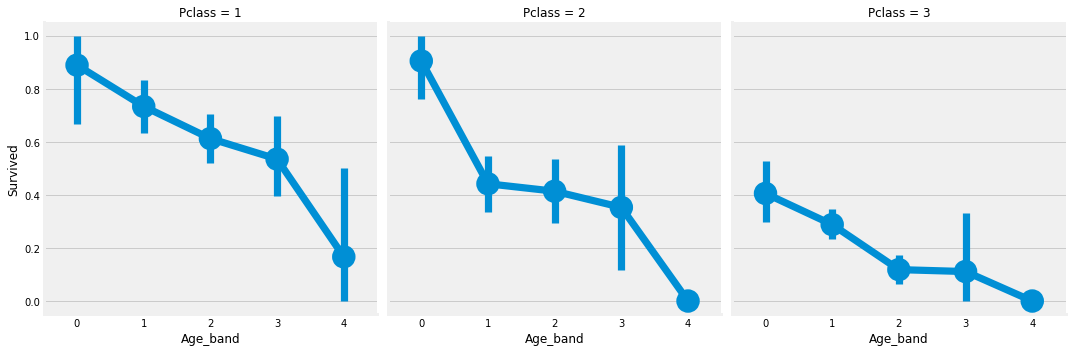

In [50]:
sns.factorplot('Age_band','Survived',data=data,col='Pclass')
plt.show()
# col을 hue로 바꾸면 색깔이 다르게 한그래프에 그려짐

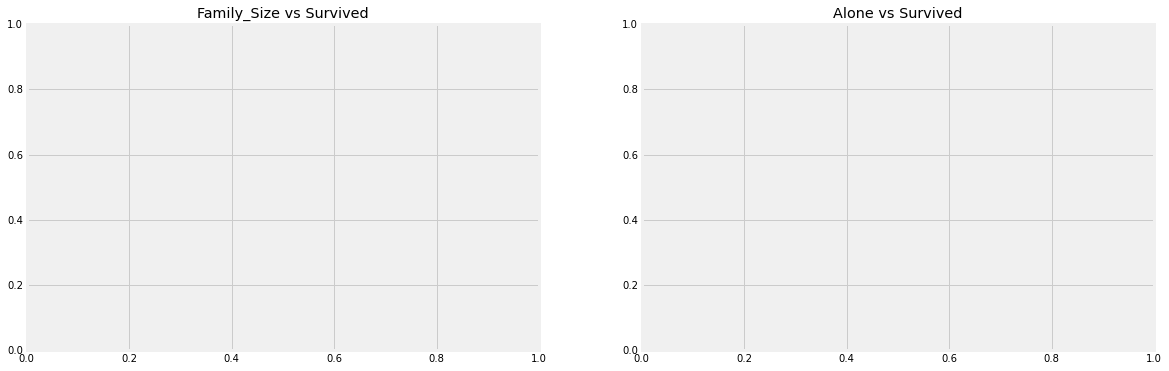

In [52]:
data['Family_Size']=0
data['Family_Size']=data['Parch']+data['SibSp']#family size
data['Alone']=0
data.loc[data.Family_Size==0,'Alone']=1#Alone

f,ax=plt.subplots(1,2,figsize=(18,6))

sns.factorplot('Family_Size','Survived',data=data,ax=ax[0])
ax[0].set_title('Family_Size vs Survived')

sns.factorplot('Alone','Survived',data=data,ax=ax[1])
ax[1].set_title('Alone vs Survived')
plt.close(2)
plt.close(3)
plt.show() # 왜 안그려지니 ?

In [ ]:
sns.factorplot('Alone','Survived',data=data,hue='Sex',col='Pclass')
plt.show()
# alone 에 따른 생존을 hue=sex 색으로 구분 

In [56]:
data['Fare_Range']=pd.qcut(data['Fare'],4)
data.groupby(['Fare_Range'])['Survived'].mean().to_frame().style.background_gradient(cmap='summer_r')
# 4등분을 해서 배정해 fare_range만듬

,Survived
Fare_Range,
"(-0.001, 7.91]",0.197309
"(7.91, 14.454]",0.303571
"(14.454, 31.0]",0.454955
"(31.0, 512.329]",0.581081


In [57]:
data['Fare_cat']=0
data.loc[data['Fare']<=7.91,'Fare_cat']=0
data.loc[(data['Fare']>7.91)&(data['Fare']<=14.454),'Fare_cat']=1
data.loc[(data['Fare']>14.454)&(data['Fare']<=31),'Fare_cat']=2
data.loc[(data['Fare']>31)&(data['Fare']<=513),'Fare_cat']=3

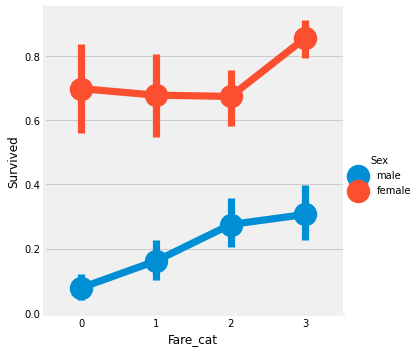

In [60]:
sns.factorplot('Fare_cat','Survived',data=data,hue='Sex')
plt.show() # 요금이 비싸면 살 확률이 높았음

In [75]:
# strig -> numeric
data['Sex'].replace(['male','female'],[0,1],inplace=True)
data['Embarked'].replace(['S','C','Q'],[0,1,2],inplace=True)
data['Initial'].replace(['Mr','Mrs','Miss','Master','Other'],[0,1,2,3,4],inplace=True)

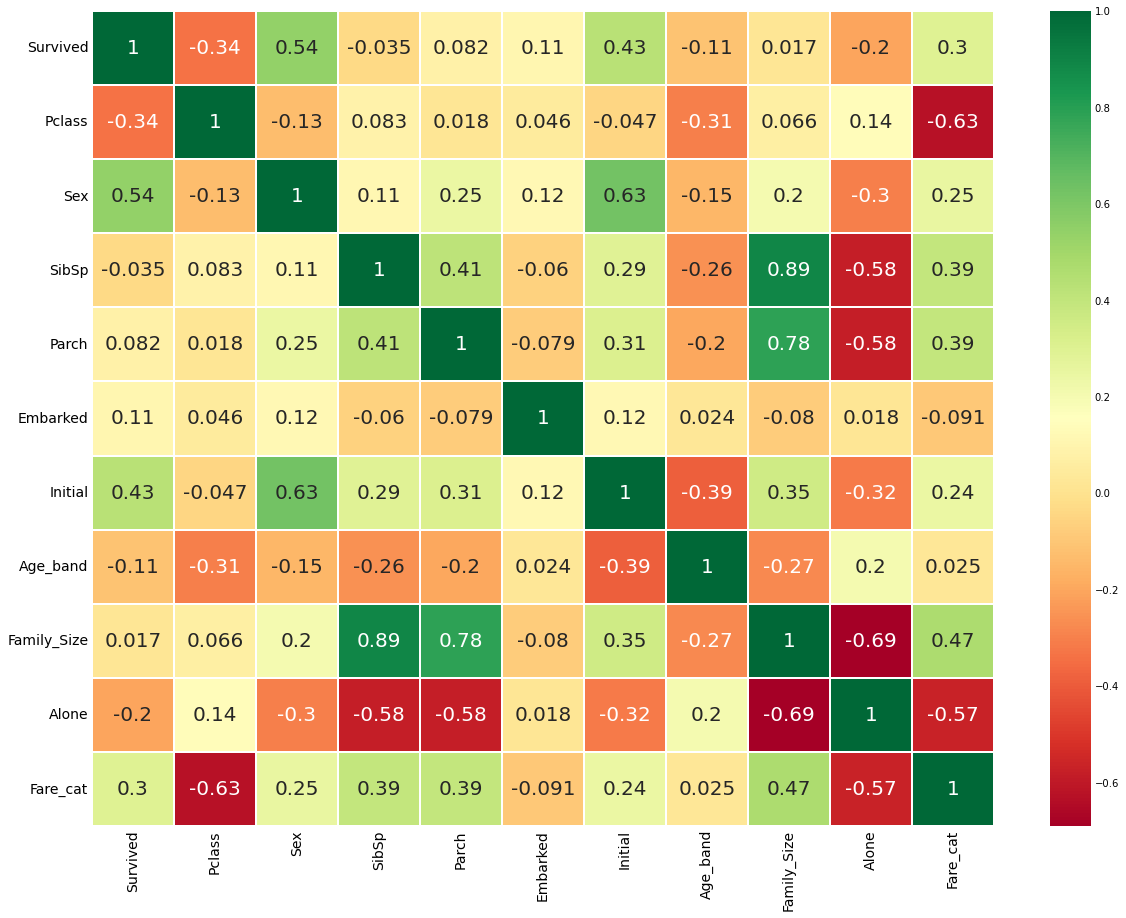

In [76]:
data.drop(['Name','Age','Ticket','Fare','Cabin','Fare_Range','PassengerId'],axis=1,inplace=True)
sns.heatmap(data.corr(),annot=True,cmap='RdYlGn',linewidths=0.2,annot_kws={'size':20})
fig=plt.gcf()
fig.set_size_inches(18,15)
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
plt.show()
# name은 ,age,Fare_range는 써먹었으니까 드랍 
# 다른 변수들은 쓸모 없어서 drop

# Predictive Modeling

In [77]:
from sklearn.linear_model import LogisticRegression #logistic regression
from sklearn import svm #support vector Machine
from sklearn.ensemble import RandomForestClassifier #Random Forest
from sklearn.neighbors import KNeighborsClassifier #KNN
from sklearn.naive_bayes import GaussianNB #Naive bayes
from sklearn.tree import DecisionTreeClassifier #Decision Tree
from sklearn.model_selection import train_test_split #training and testing data split
from sklearn import metrics #accuracy measure
from sklearn.metrics import confusion_matrix #for confusion matrix

### 분리

In [78]:
train,test=train_test_split(data,test_size=0.3,random_state=0,stratify=data['Survived'])
train_X=train[train.columns[1:]]
train_Y=train[train.columns[:1]]
test_X=test[test.columns[1:]]
test_Y=test[test.columns[:1]]
X=data[data.columns[1:]]
Y=data['Survived']

### rbf-SVM

In [91]:
model=svm.SVC(kernel='rbf',C=1,gamma=0.1)
model.fit(train_X,train_Y)
prediction1=model.predict(test_X)
print('Accuracy rbf SVM ',metrics.accuracy_score(prediction1,test_Y))

Accuracy rbf SVM  0.835820895522388


### linear-SVM

In [92]:
model=svm.SVC(kernel='rbf',C=0.1,gamma=0.1)
model.fit(train_X,train_Y)
prediction2=model.predict(test_X)
print('Accuracy linear SVM ',metrics.accuracy_score(prediction2,test_Y))

Accuracy linear SVM  0.832089552238806


### Ligisitic Regression

In [93]:
model=LogisticRegression()
model.fit(train_X,train_Y)
prediction3=model.predict(test_X)
print('Accuracy LogisticRegression ',metrics.accuracy_score(prediction3,test_Y))

Accuracy LogisticRegression  0.8134328358208955


### Decision Tree

In [94]:
model=DecisionTreeClassifier()
model.fit(train_X,train_Y)
prediction4=model.predict(test_X)
print('Accuracy Decision True ',metrics.accuracy_score(prediction4,test_Y))

Accuracy Decision True  0.8022388059701493


### KNN

In [95]:
model=KNeighborsClassifier()
model.fit(train_X,train_Y)
prediction5=model.predict(test_X)
print('Accuracy Decision True ',metrics.accuracy_score(prediction5,test_Y))

Accuracy Decision True  0.8134328358208955


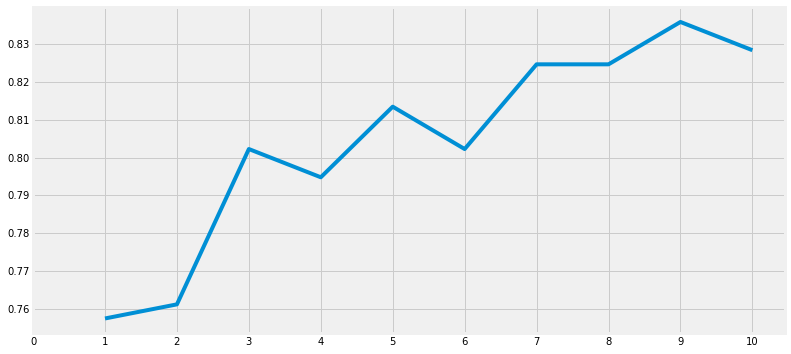

Accuracies: [0.75746269 0.76119403 0.80223881 0.79477612 0.81343284 0.80223881
 0.82462687 0.82462687 0.8358209  0.82835821] max value 0.835820895522388


In [96]:
a_index=list(range(1,11))
a=pd.Series()
x=[0,1,2,3,4,5,6,7,8,9,10]
for i in list(range(1,11)):
    model=KNeighborsClassifier(n_neighbors=i) 
    model.fit(train_X,train_Y)
    prediction=model.predict(test_X)
    a=a.append(pd.Series(metrics.accuracy_score(prediction,test_Y)))
#파라미터를 조정하면서 모델을 만들고 만든 모델의 정확도를 a에 저장한다
 
plt.plot(a_index, a) 
plt.xticks(x)
fig=plt.gcf()
fig.set_size_inches(12,6)
plt.show()
print('Accuracies:',a.values,'max value',a.values.max()) # 최적은 9일떄 0.8358

### Gaussian Naive Bayes

In [99]:
model=GaussianNB() #작은 데이터셋에 잘 작동함
model.fit(train_X,train_Y)
prediction6=model.predict(test_X)
print('The accuracy of the NaiveBayes is',metrics.accuracy_score(prediction6,test_Y))

The accuracy of the NaiveBayes is 0.8134328358208955


### Random Forests

In [100]:
model=RandomForestClassifier(n_estimators=100) # 의사결정 나무를 종합해 확률값으로 예측
model.fit(train_X,train_Y)
prediction7=model.predict(test_X)
print('The accuracy of the Random Forests is',metrics.accuracy_score(prediction7,test_Y))

The accuracy of the Random Forests is 0.8208955223880597


## Cross validation(교차 검증)

In [104]:
from sklearn.model_selection import KFold 
from sklearn.model_selection import cross_val_score 
from sklearn.model_selection import cross_val_predict
kfold = KFold(n_splits=10, shuffle=True,random_state=22) 
xyz=[] # 스코어 결과 평균
accuracy=[] # 스코어 결과 표준편차
std=[]
# 다양한 모델로 적합 시키기
classifiers=['Linear Svm','Radial Svm','Logistic Regression','KNN','Decision Tree','Naive Bayes','Random Forest']
models=[svm.SVC(kernel='linear'),svm.SVC(kernel='rbf'),LogisticRegression(),KNeighborsClassifier(n_neighbors=9),DecisionTreeClassifier(),GaussianNB(),RandomForestClassifier(n_estimators=100)]
for i in models: #9모든 모델 9번씩 교차검을을 진행하고 결과 저장하고 저장결과 평균 , 표준편차 냄
    model = i
    cv_result = cross_val_score(model,X,Y, cv = kfold,scoring = "accuracy")
    cv_result=cv_result
    xyz.append(cv_result.mean()) # 모델별 평균
    std.append(cv_result.std()) # 모델별 표준편차
    accuracy.append(cv_result)
new_models_dataframe2=pd.DataFrame({'CV Mean':xyz,'Std':std},index=classifiers)       
new_models_dataframe2

,CV Mean,Std
Linear Svm,0.784607,0.057841
Radial Svm,0.828377,0.057096
Logistic Regression,0.799176,0.040154
KNN,0.810387,0.041506
Decision Tree,0.808102,0.044398
Naive Bayes,0.795843,0.054861
Random Forest,0.807004,0.046310


<AxesSubplot:>

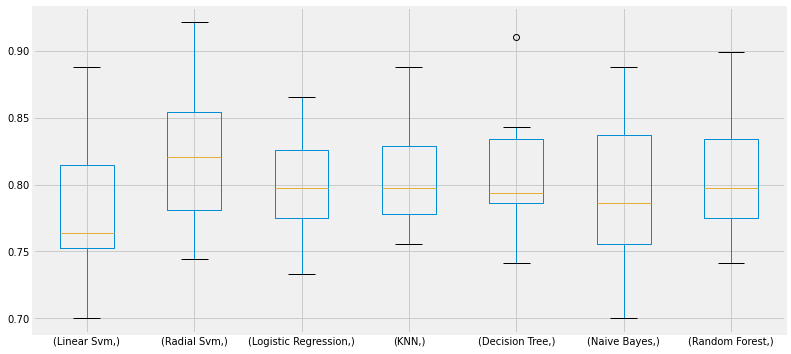

In [111]:
plt.subplots(figsize=(12,6))
box=pd.DataFrame(accuracy,index=[classifiers]) # index는 적합 모델이름 
box.T.boxplot()

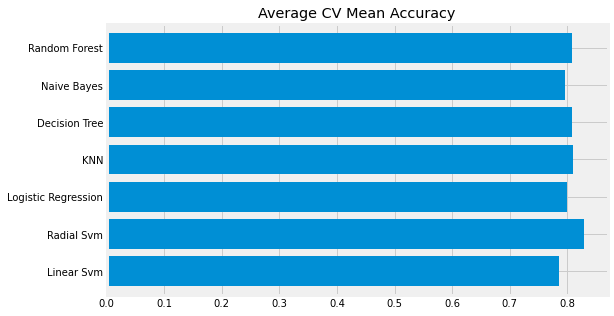

In [114]:
new_models_dataframe2['CV Mean'].plot.barh(width=0.8)
plt.title('Average CV Mean Accuracy')
fig=plt.gcf()
fig.set_size_inches(8,5)
plt.show()

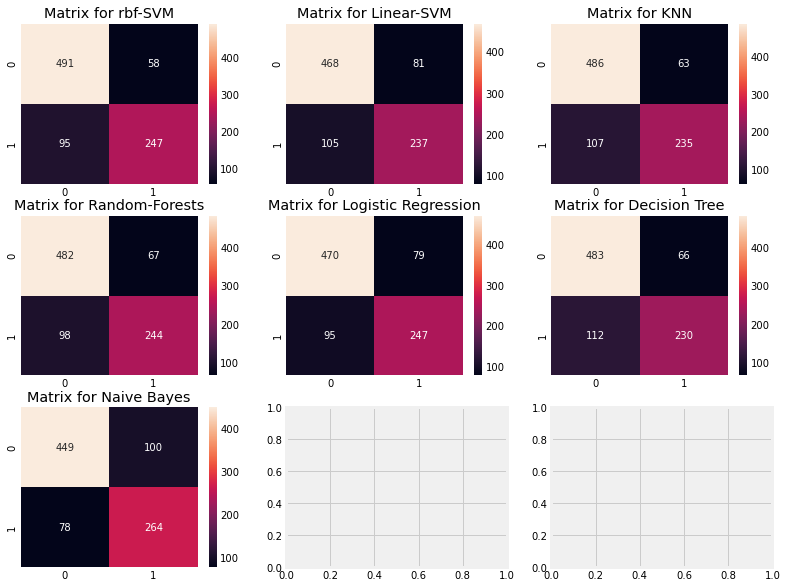

In [116]:
f,ax=plt.subplots(3,3,figsize=(12,10))
y_pred = cross_val_predict(svm.SVC(kernel='rbf'),X,Y,cv=10)
sns.heatmap(confusion_matrix(Y,y_pred),ax=ax[0,0],annot=True,fmt='2.0f')
ax[0,0].set_title('Matrix for rbf-SVM') # rbf_svm 혼동행렬

y_pred = cross_val_predict(svm.SVC(kernel='linear'),X,Y,cv=10)
sns.heatmap(confusion_matrix(Y,y_pred),ax=ax[0,1],annot=True,fmt='2.0f')
ax[0,1].set_title('Matrix for Linear-SVM') # linear 혼동행렬

y_pred = cross_val_predict(KNeighborsClassifier(n_neighbors=9),X,Y,cv=10)
sns.heatmap(confusion_matrix(Y,y_pred),ax=ax[0,2],annot=True,fmt='2.0f')
ax[0,2].set_title('Matrix for KNN') # KNN 혼동행렬

y_pred = cross_val_predict(RandomForestClassifier(n_estimators=100),X,Y,cv=10)
sns.heatmap(confusion_matrix(Y,y_pred),ax=ax[1,0],annot=True,fmt='2.0f')
ax[1,0].set_title('Matrix for Random-Forests') #random-forests 혼동행렬

y_pred = cross_val_predict(LogisticRegression(),X,Y,cv=10)
sns.heatmap(confusion_matrix(Y,y_pred),ax=ax[1,1],annot=True,fmt='2.0f')
ax[1,1].set_title('Matrix for Logistic Regression') # logisticregression 혼동행렬

y_pred = cross_val_predict(DecisionTreeClassifier(),X,Y,cv=10)
sns.heatmap(confusion_matrix(Y,y_pred),ax=ax[1,2],annot=True,fmt='2.0f')
ax[1,2].set_title('Matrix for Decision Tree') # decision tree 혼동행렬

y_pred = cross_val_predict(GaussianNB(),X,Y,cv=10)
sns.heatmap(confusion_matrix(Y,y_pred),ax=ax[2,0],annot=True,fmt='2.0f')
ax[2,0].set_title('Matrix for Naive Bayes') # native bayes 혼동행렬

plt.subplots_adjust(hspace=0.2,wspace=0.2)
plt.show()

## parameter 조정

### svm

In [117]:
from sklearn.model_selection import GridSearchCV
C=[0.05,0.1,0.2,0.3,0.25,0.4,0.5,0.6,0.7,0.8,0.9,1]
gamma=[0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,1.0]
kernel=['rbf','linear']
# 총 240개 파라미터 나옴 

hyper={'kernel':kernel,'C':C,'gamma':gamma}

gd=GridSearchCV(estimator=svm.SVC(),param_grid=hyper,verbose=True)
gd.fit(X,Y)
print(gd.best_score_)
print(gd.best_estimator_)
# 최적의 C,gamma 찾음

Fitting 5 folds for each of 240 candidates, totalling 1200 fits
0.8282593685267716
SVC(C=0.4, gamma=0.3)


### random forests

In [118]:
n_estimators=range(100,1000,100) # 10개
hyper={'n_estimators':n_estimators}

gd=GridSearchCV(estimator=RandomForestClassifier(random_state=0),param_grid=hyper,verbose=True)

gd.fit(X,Y)
print(gd.best_score_)
print(gd.best_estimator_)
# 최적 -> n_estimators=300

Fitting 5 folds for each of 9 candidates, totalling 45 fits
0.819327098110602
RandomForestClassifier(n_estimators=300, random_state=0)


## Ensembling

### voting classifier

In [119]:
from sklearn.ensemble import VotingClassifier
ensemble_lin_rbf=VotingClassifier(estimators=[('KNN',KNeighborsClassifier(n_neighbors=10)),
                                              ('RBF',svm.SVC(probability=True,kernel='rbf',C=0.5,gamma=0.1)),
                                              ('RFor',RandomForestClassifier(n_estimators=500,random_state=0)),
                                              ('LR',LogisticRegression(C=0.05)),
                                              ('DT',DecisionTreeClassifier(random_state=0)),
                                              ('NB',GaussianNB()),
                                              ('svm',svm.SVC(kernel='linear',probability=True))
                                             ], voting='soft').fit(train_X,train_Y)
print('The accuracy for ensembled model is:',ensemble_lin_rbf.score(test_X,test_Y))
# 각종 모델 최적으로 적합 시킴

cross=cross_val_score(ensemble_lin_rbf,X,Y, cv = 10,scoring = "accuracy")
# 교차검증 

print('The cross validated score is',cross.mean())
# 교차검증후 최적화

The accuracy for ensembled model is: 0.8171641791044776
The cross validated score is 0.8226716604244693


### Bagging

In [120]:
# 모든 예측에 평균을 취하는 방식이며 분산이 클수록 유리함(KNN같은)

from sklearn.ensemble import BaggingClassifier

model=BaggingClassifier(base_estimator=KNeighborsClassifier(n_neighbors=3),random_state=0,n_estimators=700)
model.fit(train_X,train_Y)
prediction=model.predict(test_X)

# KNNbagging
print('The accuracy bagged KNN :',metrics.accuracy_score(prediction,test_Y))
result=cross_val_score(model,X,Y,cv=10,scoring='accuracy')
print('The cross validated score for bagged KNN:',result.mean())

The accuracy bagged KNN : 0.832089552238806
The cross validated score for bagged KNN: 0.8104244694132333


In [ ]:
# dicision tree bagging
model=BaggingClassifier(base_estimator=DecisionTreeClassifier(),random_state=0,n_estimators=100)
model.fit(train_X,train_Y)
prediction=model.predict(test_X)

print('The accuracy for bagged Decision Tree is:',metrics.accuracy_score(prediction,test_Y))
result=cross_val_score(model,X,Y,cv=10,scoring='accuracy')
print('The cross validated score for bagged Decision Tree is:',result.mean())

### Bossting

#### adaBoost

In [121]:
from sklearn.ensemble import AdaBoostClassifier
ada=AdaBoostClassifier(n_estimators=200,random_state=0,learning_rate=0.1) #이 최적은 어디서 나왔지?

result=cross_val_score(ada,X,Y,cv=10,scoring='accuracy')
print('The cross validate score',result.mean())

The cross validate score 0.8249188514357055


#### stochastic gradient boosting

In [122]:
from sklearn.ensemble import GradientBoostingClassifier
grad=GradientBoostingClassifier(n_estimators=500,random_state=0,learning_rate=0.1)
result=cross_val_score(grad,X,Y,cv=10,scoring='accuracy')
print('The cross validated score for Gradient Boosting is:',result.mean())

The cross validated score for Gradient Boosting is: 0.8115230961298376


#### XGBoost

In [123]:
import xgboost as xg
xgboost=xg.XGBClassifier(n_estimators=900,learning_rate=0.1)
result=cross_val_score(xgboost,X,Y,cv=10,scoring='accuracy')
print('The cross validated score for XGBoost is:',result.mean())

The cross validated score for XGBoost is: 0.8160299625468165


#### 가장 잘나온 ada hyper파라미터 튜닝

In [ ]:
n_estimators=list(range(100,1100,100))
learn_rate=[0.05,0.1,0.2,0.3,0.25,0.4,0.5,0.6,0.7,0.8,0.9,1]
hyper={'n_estimators':n_estimators,'learning_rate':learn_rate}
gd=GridSearchCV(estimator=AdaBoostClassifier(),param_grid=hyper,verbose=True)
gd.fit(X,Y)
print(gd.best_score_)
print(gd.best_estimator_)

#### 가장 best model 혼동행렬


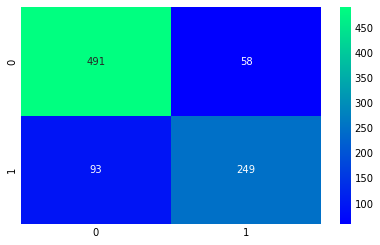

In [125]:
ada=AdaBoostClassifier(n_estimators=200,random_state=0,learning_rate=0.05) #ada 최적으로 
result=cross_val_predict(ada,X,Y,cv=10) 
sns.heatmap(confusion_matrix(Y,result),cmap='winter',annot=True,fmt='2.0f')
plt.show()

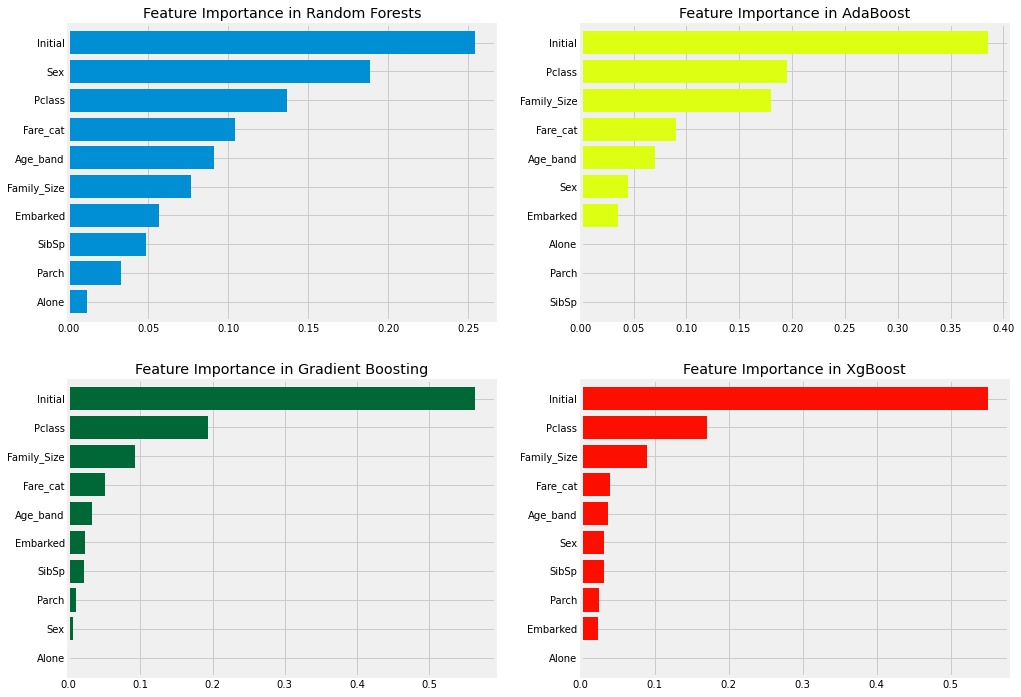

In [126]:
f,ax=plt.subplots(2,2,figsize=(15,12))

model=RandomForestClassifier(n_estimators=500,random_state=0)
model.fit(X,Y)

pd.Series(model.feature_importances_,X.columns).sort_values(ascending=True).plot.barh(width=0.8,ax=ax[0,0])
ax[0,0].set_title('Feature Importance in Random Forests')
model=AdaBoostClassifier(n_estimators=200,learning_rate=0.05,random_state=0)
model.fit(X,Y)

pd.Series(model.feature_importances_,X.columns).sort_values(ascending=True).plot.barh(width=0.8,ax=ax[0,1],color='#ddff11')
ax[0,1].set_title('Feature Importance in AdaBoost')
model=GradientBoostingClassifier(n_estimators=500,learning_rate=0.1,random_state=0)
model.fit(X,Y)

pd.Series(model.feature_importances_,X.columns).sort_values(ascending=True).plot.barh(width=0.8,ax=ax[1,0],cmap='RdYlGn_r')
ax[1,0].set_title('Feature Importance in Gradient Boosting')
model=xg.XGBClassifier(n_estimators=900,learning_rate=0.1)
model.fit(X,Y)

pd.Series(model.feature_importances_,X.columns).sort_values(ascending=True).plot.barh(width=0.8,ax=ax[1,1],color='#FD0F00')
ax[1,1].set_title('Feature Importance in XgBoost')
plt.show()
# 각 모델별로 중요한 feature들을 확인